In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ast
import random


In [2]:
df_titles = pd.read_csv("titles_filtrado.csv")

df_titles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5850 non-null   int64  
 1   id                    5850 non-null   object 
 2   title                 5849 non-null   object 
 3   type                  5850 non-null   object 
 4   description           5832 non-null   object 
 5   release_year          5850 non-null   int64  
 6   age_certification     3231 non-null   object 
 7   runtime               5850 non-null   int64  
 8   genres                5850 non-null   object 
 9   production_countries  5850 non-null   object 
 10  seasons               2106 non-null   float64
 11  imdb_id               5447 non-null   object 
 12  imdb_score            5850 non-null   float64
 13  imdb_votes            5352 non-null   float64
 14  tmdb_popularity       5759 non-null   float64
 15  tmdb_score           

In [3]:
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [4]:
df_titles.describe()

,Unnamed: 0,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,5850.000000,2106.000000,5850.000000,5.352000e+03,5759.000000,5850.000000
mean,2924.500000,2016.417094,76.888889,2.162868,6.509966,2.343938e+04,22.637925,6.827573
std,1688.893869,6.937726,39.002509,2.689041,1.114846,9.582047e+04,81.680263,1.139020
min,0.000000,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,1462.250000,2016.000000,44.000000,1.000000,5.900000,5.167500e+02,2.728500,6.200000
50%,2924.500000,2018.000000,83.000000,1.000000,6.500000,2.233500e+03,6.821000,6.800000
75%,4386.750000,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.500000
max,5849.000000,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


C:\Users\ezesp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


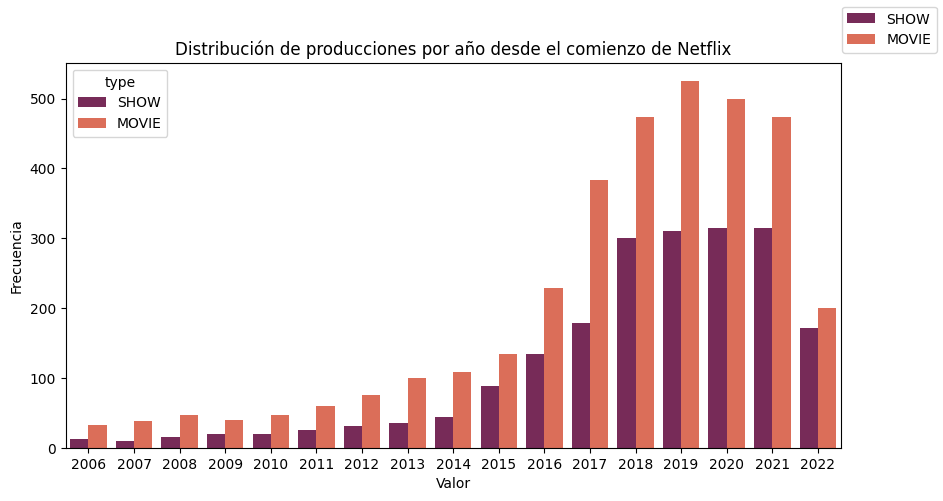

In [5]:
from sys import platlibdir


fig = plt.figure(figsize=(10,5))

sns.countplot(df_titles.release_year [df_titles.release_year >= 2006], hue=df_titles.type, palette='rocket')

fig.legend()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de producciones por año desde el comienzo de Netflix')
plt.show()


Del analisis de la cantidad de producciones agregadas por año a la platadorma, se puede ver que claramente hay mas peliculas que series y que hay un incremento mayor en los ultimos años.

In [6]:
#Limpieza de countries

df = df_titles

df["production_countries"] = df["production_countries"].apply(repair_array_bound_categories)

C:\Users\ezesp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


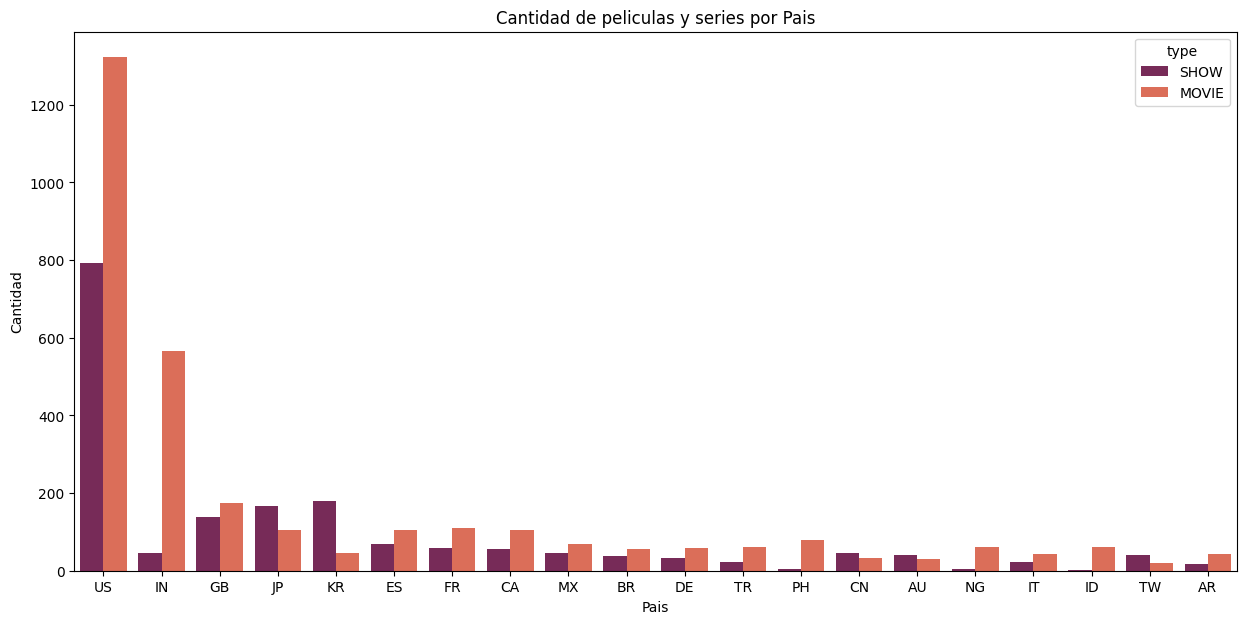

In [7]:

plt.figure(figsize=(15,7))
sns.countplot(df['production_countries'], hue=df['type'], palette='rocket', order=df['production_countries'].value_counts().iloc[:20].index)
plt.title("Cantidad de peliculas y series por Pais")
plt.xlabel("Pais")
plt.ylabel("Cantidad")
plt.show()


Como se puede ver, las producciones por paises difieren de manera muy grande. Mientras los primeros 3 tienen una mayor produccion de peliculas que se series (en India es considerablemente mayor), paises como Japon y Corea poseen mayor produccion de series que de peliculas.

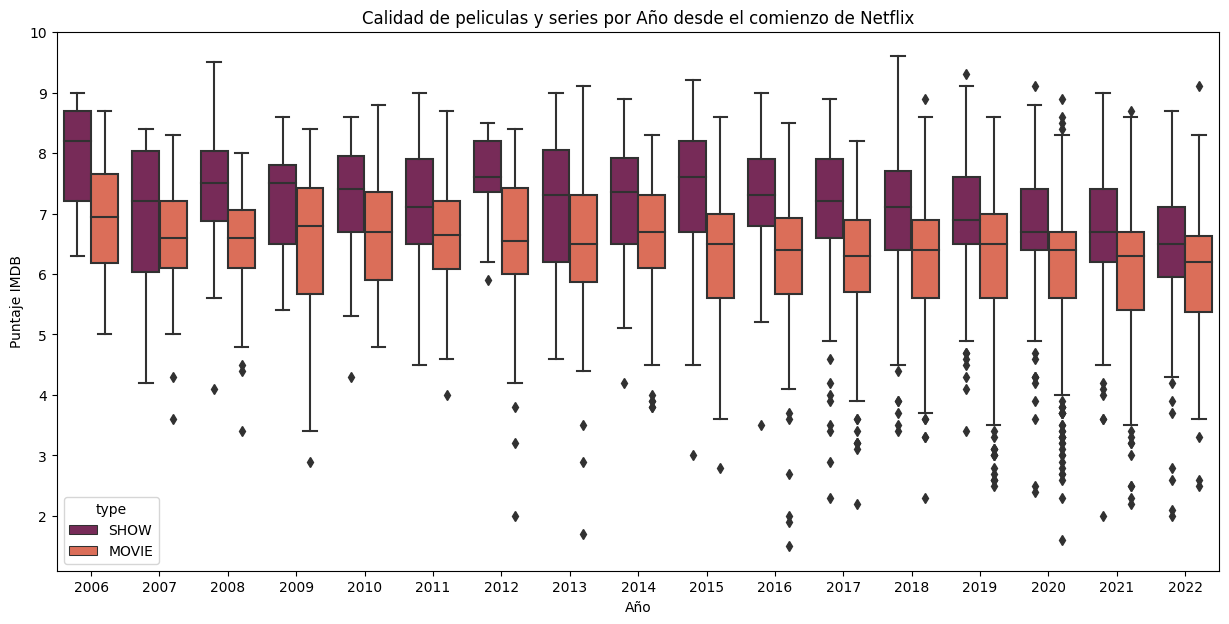

In [8]:
plt.figure(figsize=(15,7))
plot = sns.boxplot(x=df_titles.release_year [df_titles.release_year >= 2006],y=df_titles.imdb_score, hue=df_titles.type, palette='rocket')
plt.title("Calidad de peliculas y series por Año desde el comienzo de Netflix")
plt.xlabel("Año")
plt.ylabel("Puntaje IMDB")
plt.show()

De los dos tipos de producciones que hay, hay una clara tendencia de mejores puntajes en las series sobre los largometrajes, por lo que se podria inferir en que tambien hay una mayor preferencia de los usuarios de una sobre otra.